In [2]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append("../scripts")
%load_ext autoreload
%autoreload 2
from local_plot import *



Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Read poses from topic /SwarmNode1/pose
Trajectory total length  14.462950519117054
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Read poses from topic /SwarmNode2/pose
Trajectory total length  17.509403979085967
Read poses from topic /swarm_drones/swarm_drone_fused_pc
Read poses from topic /swarm_drones/swarm_frame_predict
Yaw Offset,  -0.16990290603384078 Fused Offset [0.85205296 0.31507804 0.12638109]
RMSE Fused Online 1 is 0.061,0.102,0.053
RMSE Fused Offline Path 1 is 0.052,0.120,0.045
RMSE VO 1 is 0.044,0.142,0.047
RMSE Fused Online 2 is 0.053,0.097,0.091
RMSE Fused Offline Path 2 is 0.096,0.030,0.024
RMSE VO 2 is 0.069,0.158,0.042
RMSE 1->2 0.103,0.091,0.139


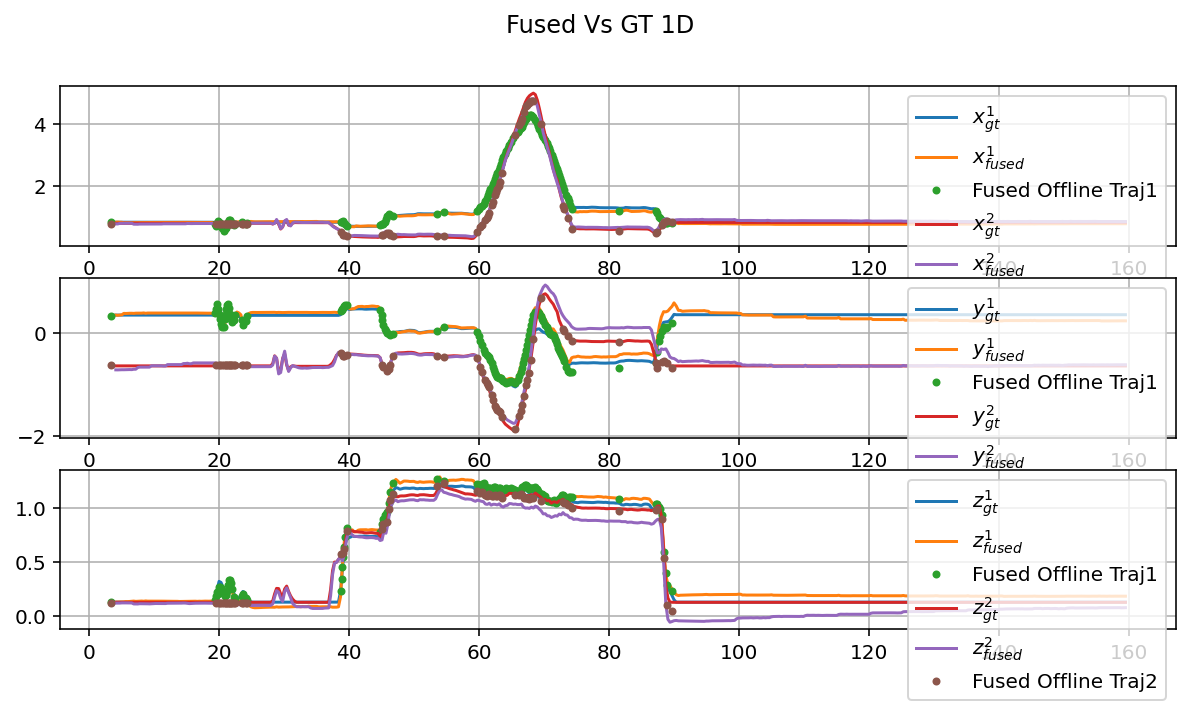

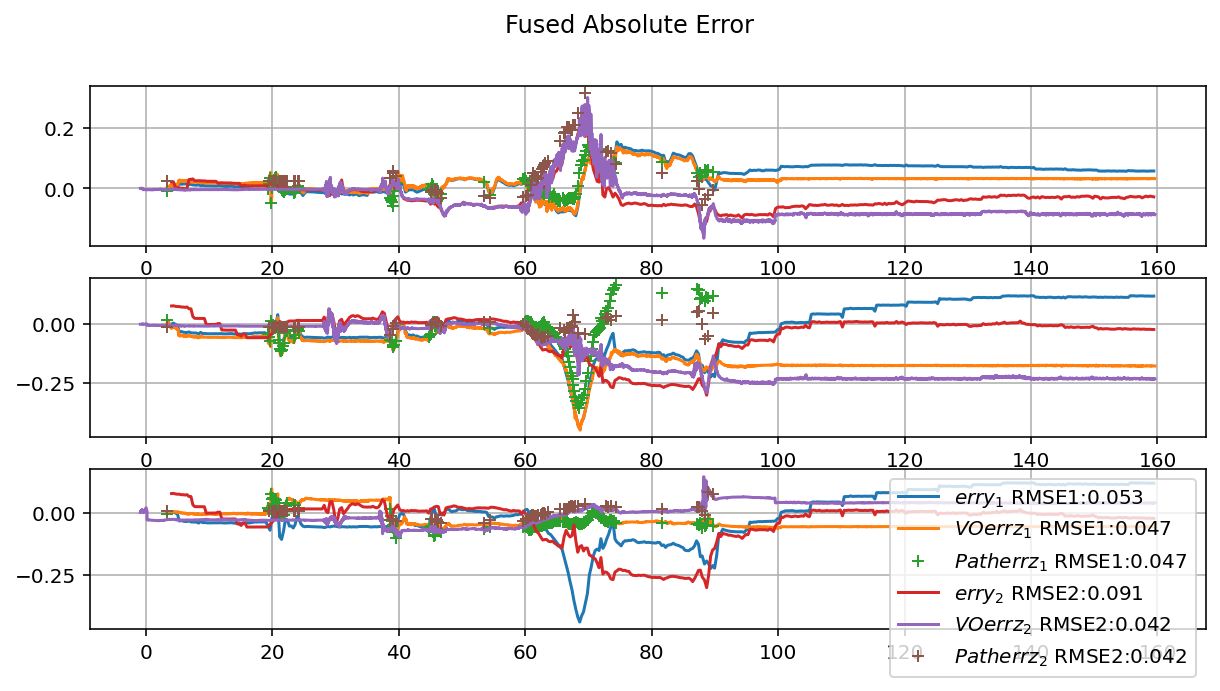

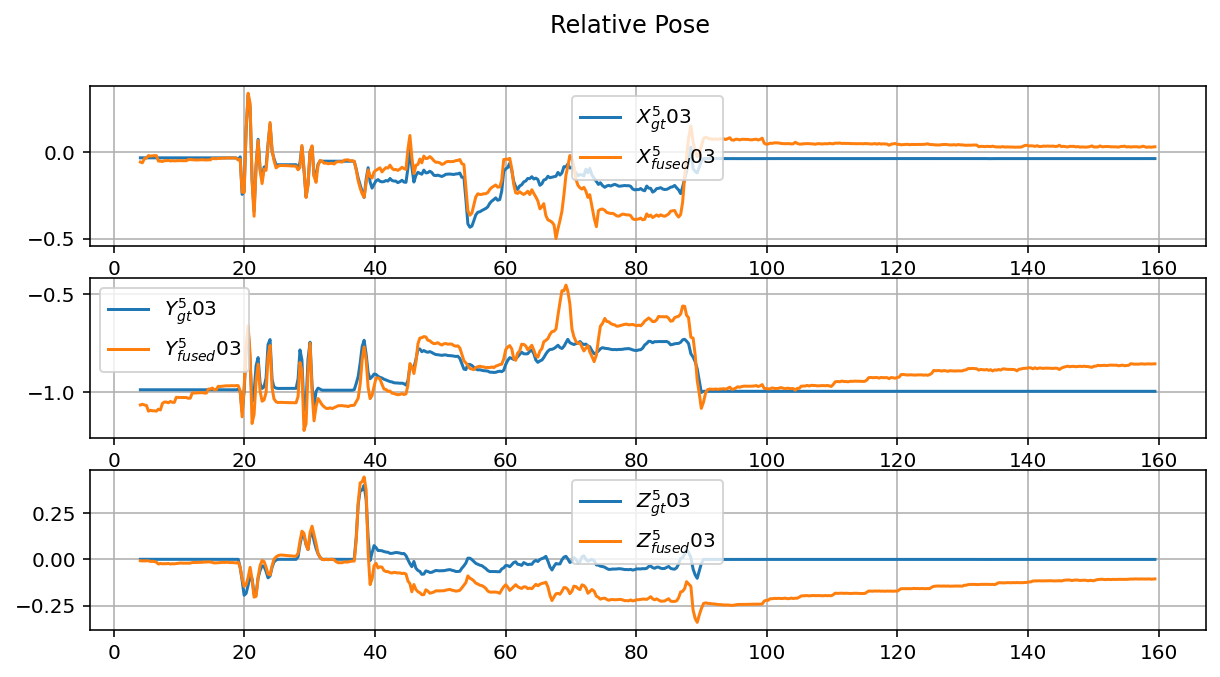

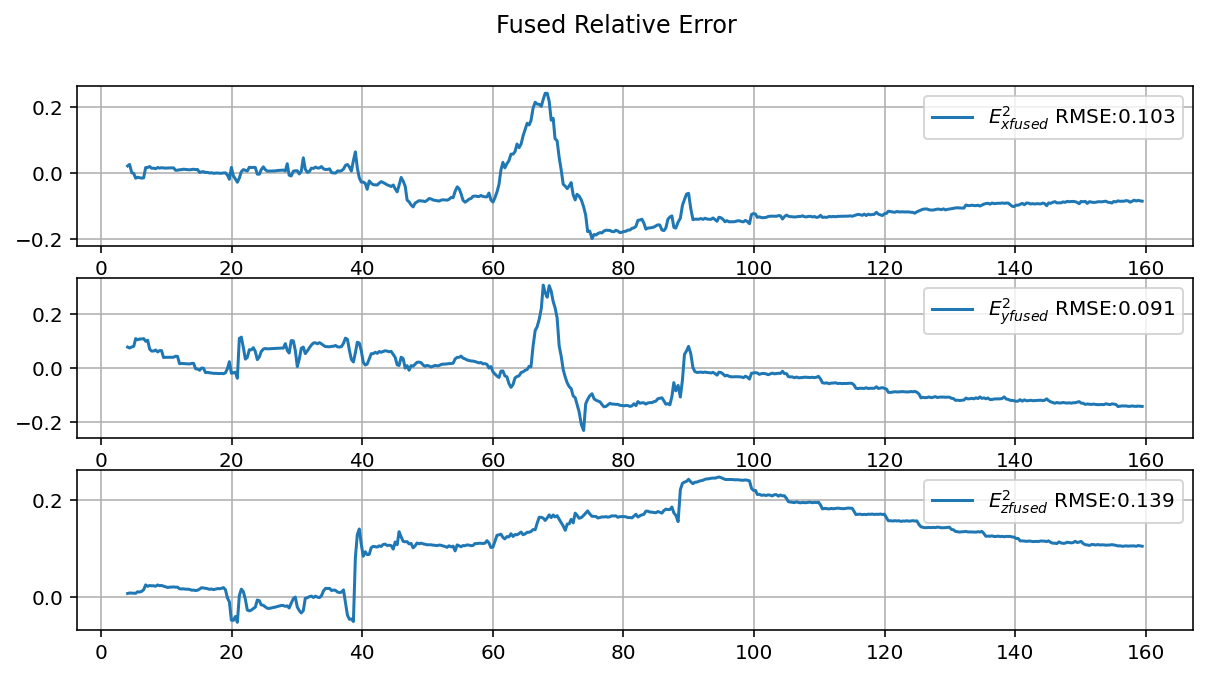

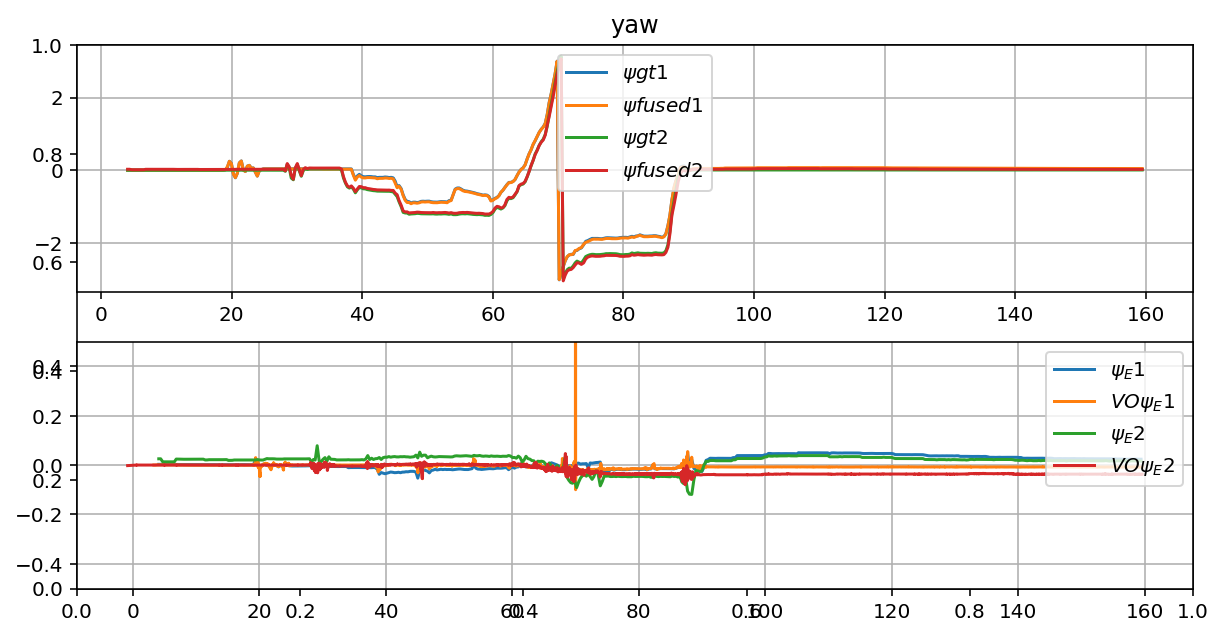

In [3]:
nodes = [1, 2]
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-19-39-05.bag", nodes, False)
#poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_2020-12-10-20-33-29.bag", nodes, False)
poses, poses_fused, poses_vo, poses_path, loops, detections = bag_read("data/swarm_local_pc.bag", nodes, True)

plt.close('all')

#plot_fused(poses, poses_fused, poses_vo, poses_path, loops, detections, nodes)
plot_fused_err(poses, poses_fused, poses_vo, poses_path, nodes, 1)
plt.show()

In [ ]:
plot_loops_error(poses, loops, nodes)

In [ ]:
plt.close('all')
plot_detection_error(poses, poses_vo, detections, nodes)
